# TP1 - Apprentissage Supervisé

Mateo MILLE \
Nerea PRUNEAU

In [2]:
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt # for a good visualization of the trees 

Matplotlib is building the font cache; this may take a moment.


## Part 1 : Basic tests

In [3]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]


In [4]:
# Build the decision tree.
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


In [5]:
# Now we can ask the decision tree to predict the outcome for unknown examples.
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

# Expectd output [0, 1, 0]

array([1, 1, 0])

## Part 2 : Visualization 

In [6]:
# First method visualization of a decision tree
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1



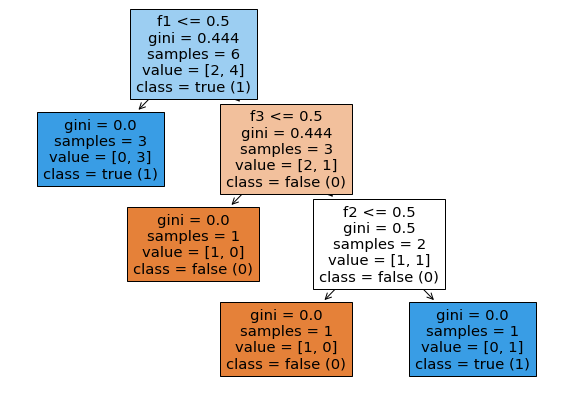

In [7]:
# More readable method 
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

# figsize : restrains the size of the plot,
# feature_names : gives the names of the different features,
# class_names : corresponds to human readable labels for each class,
# filled : is a boolean indicating a preference to show a colorful tree.

Tasks:\
Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation.


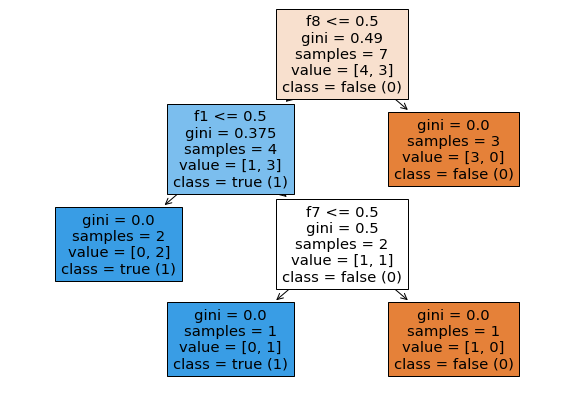

In [8]:
# Dataset 
# debut 
X_Test = [[1,0,1,0,1,0,1,0],[0,0,0,0,1,0,1,0],[1,1,1,1,0,0,0,0],[0,0,0,1,0,1,0,1],[1,0,1,1,1,0,0,1],[0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1]]
Y_Test = [0,1,1,0,0,1,0]

# Build the decision tree.
clf_test = tree.DecisionTreeClassifier()
clf_test = clf.fit(X_Test, Y_Test)

fig_test = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf_test, 
                   feature_names= ("f1","f2","f3","f4", "f5", "f6", "f7", "f8"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

## Part 3 : The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend

In [9]:
# import the dataset 
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")
# train_examples : represents the whole binarised training set based on the information gotten from the database
# train_labels : represents the labels associated with the training dataset -> (tendency to re-offend)
# features : represents the features associated with each binary field in the training dataset
# prediction : How many years will pass in average before the person re-offend

Have a look at the different parameters of the DecisionTreeClassifier.fit function. We will be studying three parameters:

    splitter
    max_depth
    min_samples_leaf

What do they represent?

<p style="color : blue">
splitter : the strategy to choose the split at each node. 
</p>
<p style="color : blue">
max_depth : allows to define a maximum depth of the tree and prevents from overfitting controlling the size of the tree 
</p>
<p style="color : blue"> 
min_samples_leaf : to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered
</p>

Tasks:

    1: Build severals decision trees (different parameters) and visualize them
    2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test multiple times.
    3: Do again the evaluation using 5-cross-validation
    4: Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs.
    5: Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters?
    6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.


### 1. Several decision trees

[Text(162.5175, 199.32, 'X[37] <= 0.5\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(79.515, 163.07999999999998, 'X[151] <= 0.5\ngini = 0.443\nsamples = 1657\nvalue = [549, 1108]'),
 Text(44.64, 126.83999999999999, 'X[80] <= 0.5\ngini = 0.416\nsamples = 1330\nvalue = [393, 937]'),
 Text(22.32, 90.6, 'X[92] <= 0.5\ngini = 0.295\nsamples = 334\nvalue = [60, 274]'),
 Text(11.16, 54.359999999999985, 'X[93] <= 0.5\ngini = 0.269\nsamples = 306\nvalue = [49, 257]'),
 Text(5.58, 18.119999999999976, 'gini = 0.265\nsamples = 305\nvalue = [48, 257]'),
 Text(16.740000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(33.480000000000004, 54.359999999999985, 'X[71] <= 0.5\ngini = 0.477\nsamples = 28\nvalue = [11, 17]'),
 Text(27.9, 18.119999999999976, 'gini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(39.06, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(66.96000000000001, 90.6, 'X[46] <= 0.5\ngini = 0.445\nsamples = 996\nvalue =

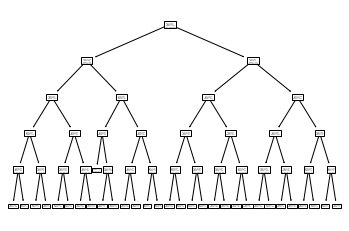

In [10]:
clf_bigdepth = tree.DecisionTreeClassifier(max_depth=5)
clf_bigdepth = clf_bigdepth.fit(train_examples, train_labels)
tree.plot_tree(clf_bigdepth)

[Text(167.4, 163.07999999999998, 'X[18] <= 0.5\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(83.7, 54.360000000000014, 'gini = 0.471\nsamples = 3616\nvalue = [2241, 1375]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.443\nsamples = 1657\nvalue = [549, 1108]')]

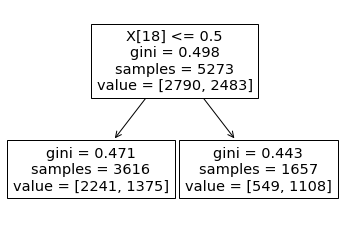

In [11]:
clf_smalldepth = tree.DecisionTreeClassifier(max_depth=1)
clf_smalldepth = clf_smalldepth.fit(train_examples, train_labels)
tree.plot_tree(clf_smalldepth)

[Text(172.9089362157534, 210.192, 'X[37] <= 0.5\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(83.5745933219178, 195.696, 'X[151] <= 0.5\ngini = 0.443\nsamples = 1657\nvalue = [549, 1108]'),
 Text(60.51767979452055, 181.2, 'X[80] <= 0.5\ngini = 0.416\nsamples = 1330\nvalue = [393, 937]'),
 Text(45.934674657534245, 166.704, 'X[92] <= 0.5\ngini = 0.295\nsamples = 334\nvalue = [60, 274]'),
 Text(39.12688356164384, 152.208, 'X[1] <= 0.5\ngini = 0.269\nsamples = 306\nvalue = [49, 257]'),
 Text(32.39075342465753, 137.712, 'X[107] <= 0.5\ngini = 0.239\nsamples = 238\nvalue = [33, 205]'),
 Text(30.097602739726028, 123.216, 'X[100] <= 0.5\ngini = 0.216\nsamples = 219\nvalue = [27, 192]'),
 Text(23.504794520547946, 108.72, 'X[60] <= 0.5\ngini = 0.257\nsamples = 165\nvalue = [25, 140]'),
 Text(21.21164383561644, 94.22399999999999, 'X[110] <= 0.5\ngini = 0.245\nsamples = 154\nvalue = [22, 132]'),
 Text(14.905479452054795, 79.72799999999998, 'X[81] <= 0.5\ngini = 0.267\nsamples = 126\

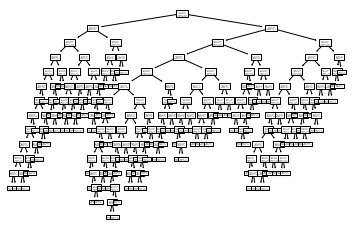

In [12]:
clf_bigsampleleaf = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf_bigsampleleaf = clf_bigsampleleaf.fit(train_examples, train_labels)
tree.plot_tree(clf_bigsampleleaf)

[Text(237.9373990729665, 211.04470588235293, 'X[18] <= 0.5\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(171.95544258373207, 198.25411764705882, 'X[52] <= 0.5\ngini = 0.471\nsamples = 3616\nvalue = [2241, 1375]'),
 Text(122.62150119617225, 185.4635294117647, 'X[8] <= 0.5\ngini = 0.496\nsamples = 2012\nvalue = [1101, 911]'),
 Text(91.35915071770336, 172.6729411764706, 'X[79] <= 0.5\ngini = 0.5\nsamples = 1651\nvalue = [841, 810]'),
 Text(68.18145933014354, 159.88235294117646, 'X[132] <= 0.5\ngini = 0.472\nsamples = 693\nvalue = [264, 429]'),
 Text(50.660526315789475, 147.09176470588235, 'X[1] <= 0.5\ngini = 0.446\nsamples = 540\nvalue = [181, 359]'),
 Text(34.641387559808614, 134.30117647058825, 'X[159] <= 0.5\ngini = 0.405\nsamples = 373\nvalue = [105, 268]'),
 Text(24.429186602870814, 121.51058823529411, 'X[116] <= 0.5\ngini = 0.426\nsamples = 325\nvalue = [100, 225]'),
 Text(16.019138755980862, 108.72, 'X[62] <= 0.5\ngini = 0.465\nsamples = 166\nvalue = [61, 105]'),
 T

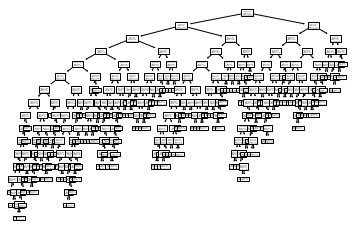

In [13]:
clf_smallsampleleaf = tree.DecisionTreeClassifier(min_samples_leaf=5)
clf_smallsampleleaf = clf_smallsampleleaf.fit(train_examples, train_labels)
tree.plot_tree(clf_smallsampleleaf)

[Text(166.55790800297044, 212.004, 'X[37] <= 0.094\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(86.67152690506113, 201.132, 'X[151] <= 0.867\ngini = 0.443\nsamples = 1657\nvalue = [549, 1108]'),
 Text(64.40778590197647, 190.26, 'X[80] <= 0.24\ngini = 0.416\nsamples = 1330\nvalue = [393, 937]'),
 Text(44.66613732434595, 179.388, 'X[92] <= 0.478\ngini = 0.295\nsamples = 334\nvalue = [60, 274]'),
 Text(27.520690049126017, 168.516, 'X[131] <= 0.824\ngini = 0.269\nsamples = 306\nvalue = [49, 257]'),
 Text(26.296698274877187, 157.644, 'X[0] <= 0.323\ngini = 0.265\nsamples = 305\nvalue = [48, 257]'),
 Text(11.015925968239461, 146.772, 'X[101] <= 0.812\ngini = 0.348\nsamples = 67\nvalue = [15, 52]'),
 Text(6.119958871244146, 135.9, 'X[129] <= 0.812\ngini = 0.293\nsamples = 56\nvalue = [10, 46]'),
 Text(2.447983548497658, 125.02799999999999, 'X[111] <= 0.639\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(1.223991774248829, 114.156, 'gini = 0.0\nsamples = 19\nvalue = [0, 1

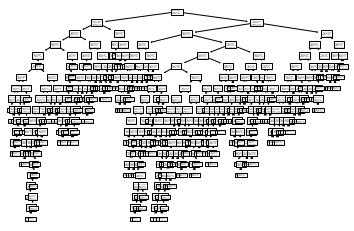

In [14]:
clf_randomsplitter = tree.DecisionTreeClassifier(splitter = "random")
clf_randomsplitter = clf_randomsplitter.fit(train_examples, train_labels)
tree.plot_tree(clf_randomsplitter)

[Text(236.87410347799914, 212.004, 'X[18] <= 0.5\ngini = 0.498\nsamples = 5273\nvalue = [2790, 2483]'),
 Text(168.48736249452716, 201.132, 'X[52] <= 0.5\ngini = 0.471\nsamples = 3616\nvalue = [2241, 1375]'),
 Text(133.34992201182138, 190.26, 'X[152] <= 0.5\ngini = 0.496\nsamples = 2012\nvalue = [1101, 911]'),
 Text(100.39923106392294, 179.388, 'X[79] <= 0.5\ngini = 0.5\nsamples = 1651\nvalue = [841, 810]'),
 Text(71.95030100700525, 168.516, 'X[132] <= 0.5\ngini = 0.472\nsamples = 693\nvalue = [264, 429]'),
 Text(46.421617775831876, 157.644, 'X[0] <= 0.5\ngini = 0.446\nsamples = 540\nvalue = [181, 359]'),
 Text(25.029378283712784, 146.772, 'X[101] <= 0.5\ngini = 0.496\nsamples = 167\nvalue = [76, 91]'),
 Text(20.741768826619968, 135.9, 'X[64] <= 0.5\ngini = 0.5\nsamples = 151\nvalue = [75, 76]'),
 Text(15.684588441330998, 125.02799999999999, 'X[16] <= 0.5\ngini = 0.492\nsamples = 114\nvalue = [50, 64]'),
 Text(10.260945709281962, 114.156, 'X[118] <= 0.5\ngini = 0.497\nsamples = 106\nval

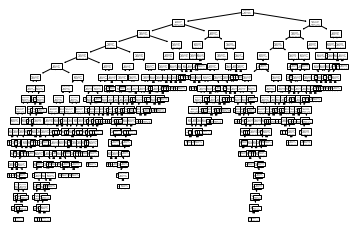

In [15]:
clf_bestsplitter = tree.DecisionTreeClassifier(splitter="best")
clf_bestsplitter = clf_bestsplitter.fit(train_examples, train_labels)
tree.plot_tree(clf_bestsplitter)

### 2: Evaluation on different trees

In [26]:
import matplotlib.pyplot as plt
trainingPartition = round(train_labels.size*0.8)

trainingData = train_examples[:trainingPartition]
testingData = train_examples[trainingPartition:]

trainingLabel = train_labels[:trainingPartition]
testingLabel = train_labels[trainingPartition:]

In [27]:
# Trained with the same data

clf_1 = tree.DecisionTreeClassifier(min_samples_leaf=5,max_depth=10,splitter="best")
clf_1 = clf_1.fit(trainingData,trainingLabel)

clf_2 = tree.DecisionTreeClassifier(min_samples_leaf=1,max_depth=10,splitter="best")
clf_2 = clf_2.fit(trainingData,trainingLabel)

clf_3 = tree.DecisionTreeClassifier(min_samples_leaf=5,max_depth=1,splitter="random")
clf_3 = clf_3.fit(trainingData,trainingLabel)

clf_4 = tree.DecisionTreeClassifier(min_samples_leaf=1,max_depth=20,splitter="random")
clf_4 = clf_4.fit(trainingData,trainingLabel)

clf_5 = tree.DecisionTreeClassifier(min_samples_leaf=1,max_depth=50,splitter="best")
clf_5 = clf_5.fit(trainingData,trainingLabel)

clf_6 = tree.DecisionTreeClassifier()
clf_6 = clf_6.fit(trainingData,trainingLabel)

In [28]:
from sklearn.metrics import *
clf_1_predict = clf_1.predict(testingData)
clf_2_predict = clf_2.predict(testingData)
clf_3_predict = clf_3.predict(testingData)
clf_4_predict = clf_4.predict(testingData)
clf_5_predict = clf_5.predict(testingData)
clf_6_predict = clf_6.predict(testingData)


# print("Accuracy clf1 : " + str(accuracy_score(testingLabel,clf_1_predict)))
# print("Accuracy clf2 : " + str(accuracy_score(testingLabel,clf_2_predict)))
# print("Accuracy clf3 : " + str(accuracy_score(testingLabel,clf_3_predict)))
# print("Accuracy clf4 : " + str(accuracy_score(testingLabel,clf_4_predict)))
# print("Accuracy clf5 : " + str(accuracy_score(testingLabel,clf_5_predict)))
# print("Accuracy clf6 : " + str(accuracy_score(testingLabel,clf_6_predict)))


### 3: Cross validation

In [29]:
# Evalutation with the same data set

print("Prediction value : " + prediction)

l = clf_1.predict(testingData)
predictionClf1 = (np.count_nonzero(l > 0))
print("Number of recidive predicted by clf_1 : "+ str(predictionClf1))

l = clf_2.predict(testingData)
predictionClf2 = (np.count_nonzero(l > 0))
print("Number of recidive predicted by clf_2 : "+ str(predictionClf2))

l = clf_3.predict(testingData)
predictionClf3 = (np.count_nonzero(l > 0))
print("Number of recidive predicted by clf_3 : "+ str(predictionClf3))

l = clf_4.predict(testingData)
predictionClf4 = (np.count_nonzero(l > 0))
print("Number of recidive predicted by clf_4 : "+ str(predictionClf4))

l = clf_5.predict(testingData)
predictionClf5 = (np.count_nonzero(l > 0))
print("Number of recidive predicted by clf_5 : "+ str(predictionClf5))

#l = clf_6.predict(testingData)
#predictionClf6 = (np.count_nonzero(l > 0))
#print("Number of recidive predicted by clf_6 : "+ str(predictionClf6))

print("Average prediction : "+ str((predictionClf1+predictionClf2+predictionClf3+predictionClf4+predictionClf5)/5))


Prediction value : two_year_recid
Number of recidive predicted by clf_1 : 417
Number of recidive predicted by clf_2 : 398
Number of recidive predicted by clf_3 : 328
Number of recidive predicted by clf_4 : 412
Number of recidive predicted by clf_5 : 413
Average prediction : 393.6


### 4: Evaluating the impact of the maximum depth, splitting criterion and the minimum sample leafs

In [84]:
# Creating trees with varying parameters

# Maximum depth impact
clf_low_depth = tree.DecisionTreeClassifier(max_depth=2)
clf_medium_depth = tree.DecisionTreeClassifier(max_depth=10)
clf_high_depth = tree.DecisionTreeClassifier(max_depth=50)
clf_very_high_depth = tree.DecisionTreeClassifier(max_depth=70)

# more concise way innit
depth_trees = [tree.DecisionTreeClassifier(max_depth=i) for i in range(1,100,5)]
map(lambda x: x.fit(trainingData,trainingLabel),depth_trees)
map(lambda x: x.predict(testingData),depth_trees)
map(lambda x: accuracy_score(testingLabel,x),depth_trees)

clf_low_depth = clf_low_depth.fit(trainingData,trainingLabel)
clf_medium_depth = clf_medium_depth.fit(trainingData,trainingLabel)
clf_high_depth = clf_high_depth.fit(trainingData,trainingLabel)
clf_very_high_depth = clf_very_high_depth.fit(trainingData,trainingLabel)

predict1 = clf_low_depth.predict(testingData)
predict2 = clf_medium_depth.predict(testingData)
predict3 = clf_high_depth.predict(testingData)
predict4 = clf_very_high_depth.predict(testingData)
print("Maximum depth variation")
print("Accuracy clf_low : " + str(accuracy_score(testingLabel,predict1)))
print("Accuracy clf_medium : " + str(accuracy_score(testingLabel,predict2)))
print("Accuracy clf_high : " + str(accuracy_score(testingLabel,predict3)))
print("Accuracy clf_very_high : " + str(accuracy_score(testingLabel,predict4)))
print()
# splitting criterion
clf_low_splitter = tree.DecisionTreeClassifier(splitter='best')
clf_medium_splitter = tree.DecisionTreeClassifier(splitter='random')

clf_low_splitter = clf_low_splitter.fit(trainingData,trainingLabel)
clf_medium_splitter = clf_medium_splitter.fit(trainingData,trainingLabel)

predict5 = clf_low_splitter.predict(testingData)
predict6 = clf_medium_splitter.predict(testingData)
print("Splitter criterion variation")
print("Accuracy clf_best : " + str(accuracy_score(testingLabel,predict5)))
print("Accuracy clf_random : " + str(accuracy_score(testingLabel,predict6)))
print()
# minimum sample leafs
clf_low_leaf = tree.DecisionTreeClassifier(min_samples_leaf=2)
clf_medium_leaf = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf_high_leaf = tree.DecisionTreeClassifier(min_samples_leaf=50)
clf_very_high_leaf = tree.DecisionTreeClassifier(min_samples_leaf=70)

clf_low_leaf = clf_low_leaf.fit(trainingData,trainingLabel)
clf_medium_leaf = clf_medium_leaf.fit(trainingData,trainingLabel)
clf_high_leaf = clf_high_leaf.fit(trainingData,trainingLabel)
clf_very_high_leaf = clf_very_high_leaf.fit(trainingData,trainingLabel)

predict7 = clf_low_leaf.predict(testingData)
predict8 = clf_medium_leaf.predict(testingData)
predict9 = clf_high_leaf.predict(testingData)
predict10 = clf_very_high_leaf.predict(testingData)

print("Min sample leaf size variation")
print("Accuracy leaf clf_low : " + str(accuracy_score(testingLabel,predict7)))
print("Accuracy leaf clf_medium : " + str(accuracy_score(testingLabel,predict8)))
print("Accuracy leaf clf_high : " + str(accuracy_score(testingLabel,predict9)))
print("Accuracy leaf clf_very_high : " + str(accuracy_score(testingLabel,predict10)))


print("Default tree")
clf_default = tree.DecisionTreeClassifier()
clf_default = clf_default.fit(trainingData,trainingLabel)
predict11 = clf_default.predict(testingData)
print("Accuracy clf_default : " + str(accuracy_score(testingLabel,predict11)))

# hyperopt => library to better optimization
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics for more metrics

Maximum depth variation
Accuracy clf_low : 0.614218009478673
Accuracy clf_medium : 0.6350710900473934
Accuracy clf_high : 0.6303317535545023
Accuracy clf_very_high : 0.6293838862559241

Splitter criterion variation
Accuracy clf_best : 0.6274881516587678
Accuracy clf_random : 0.6274881516587678

Min sample leaf size variation
Accuracy leaf clf_low : 0.6322274881516587
Accuracy leaf clf_medium : 0.6417061611374407
Accuracy leaf clf_high : 0.6672985781990521
Accuracy leaf clf_very_high : 0.6511848341232227
Default tree
Accuracy clf_default : 0.6293838862559241


### 5: Studying the confusion matrix

Maximum depth variation
confusion_matrix clf_low : [[473  86]
 [321 175]]
confusion_matrix clf_medium : [[415 144]
 [242 254]]
confusion_matrix clf_high : [[405 154]
 [237 259]]
confusion_matrix clf_very_high : [[406 153]
 [237 259]]

Splitter criterion variation
confusion_matrix clf_best : [[404 155]
 [236 260]]
confusion_matrix clf_random : [[405 154]
 [237 259]]

Min sample leaf size variation
confusion_matrix leaf clf_low : [[407 152]
 [237 259]]
confusion_matrix leaf clf_medium : [[405 154]
 [224 272]]
confusion_matrix leaf clf_high : [[385 174]
 [178 318]]
confusion_matrix leaf clf_very_high : [[410 149]
 [219 277]]


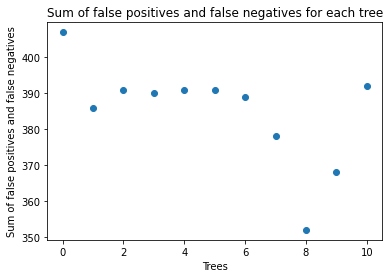

In [39]:
# creating the confusion matrix
print("Maximum depth variation")
print("confusion_matrix clf_low : " + str(confusion_matrix(testingLabel,predict1)))
print("confusion_matrix clf_medium : " + str(confusion_matrix(testingLabel,predict2)))
print("confusion_matrix clf_high : " + str(confusion_matrix(testingLabel,predict3)))
print("confusion_matrix clf_very_high : " + str(confusion_matrix(testingLabel,predict4)))
print()

print("Splitter criterion variation")
print("confusion_matrix clf_best : " + str(confusion_matrix(testingLabel,predict5)))
print("confusion_matrix clf_random : " + str(confusion_matrix(testingLabel,predict6)))
print()

print("Min sample leaf size variation")
print("confusion_matrix leaf clf_low : " + str(confusion_matrix(testingLabel,predict7)))
print("confusion_matrix leaf clf_medium : " + str(confusion_matrix(testingLabel,predict8)))
print("confusion_matrix leaf clf_high : " + str(confusion_matrix(testingLabel,predict9)))
print("confusion_matrix leaf clf_very_high : " + str(confusion_matrix(testingLabel,predict10)))

predictions=[predict1,predict2,predict3,predict4,predict5,predict6,predict7,predict8,predict9,predict10,predict11]
matrices = [confusion_matrix(testingLabel,prediction) for prediction in predictions]
# Ordering by false positives and false negatives
# Matrix dimension is 2x2 => Evaluate error with sum of false negatives and false positives
errors = [(confusion_matrix(testingLabel,prediction)[1,0] + confusion_matrix(testingLabel,prediction)[0,1]) for prediction in predictions]
plt.scatter([i for i in range(0,len(predictions))],errors)
plt.title("Sum of false positives and false negatives for each tree")
plt.xlabel("Trees")
plt.ylabel("Sum of false positives and false negatives")
plt.show()

# TODO - evaluate result for each critteria

### 6: Asses fairness

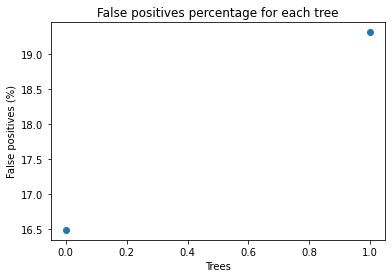

In [78]:
# From the same data set, check false positives for general ethnic group and for afro-americans
afro_americans_test_data = [element for element in testingData if (element[0])]
afro_americans_test_label = [element for index,element in enumerate(testingLabel) if (testingData[index][0])]
clf_high_leaf = clf_high_leaf.fit(trainingData,trainingLabel)

# Prediction on specific ethnicity and in general
racial_bias_predict = clf_high_leaf.predict(afro_americans_test_data)
general = clf_high_leaf.predict(testingData)

predictions = [general,racial_bias_predict]
errors = [100*(confusion_matrix(testingLabel,general)[0,1])/len(general),100*(confusion_matrix(afro_americans_test_label,racial_bias_predict)[0,1])/len(racial_bias_predict)]
plt.scatter([i for i in range(0,len(predictions))],errors)
plt.title("False positives percentage for each tree")
plt.xlabel("Trees")
plt.ylabel("False positives (%)")
plt.show()

# We can conclude that there is a higher rate of false positives for the afro-american population than the general one for the same training set